In [ ]:
!git clone https://github.com/tom38110/Apprentissage-profond.git
path = "./Apprentissage-profond/"

Cloning into 'Apprentissage-profond'...
remote: Enumerating objects: 1575, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 1575 (delta 10), reused 24 (delta 9), pack-reused 1548
Receiving objects: 100% (1575/1575), 349.25 MiB | 31.26 MiB/s, done.
Resolving deltas: 100% (108/108), done.
Updating files: 100% (1094/1094), done.


In [ ]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='Train', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)

    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))

    current_index = 0

    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)

        # Chargement des images,
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1

    return x, y

In [ ]:
labels = ['Capitole', 'Basilique_Saint_Sernin', 'Cathedrale_Saint_Etienne','Chapelle_Saint_Joseph','Couvent_Des_Jacobins','Gare_Matabiau','Hotel_Assezat','Hotel_Dieu','Monument_Aux_Morts','Musee_Des_Augustins']

IMAGE_SIZE = 64

x_train, y_train = load_data(path, labels, dataset='Train', image_size=IMAGE_SIZE)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='Validation', image_size=IMAGE_SIZE)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='Test', image_size=IMAGE_SIZE)
print(x_test.shape, y_test.shape)

(885, 64, 64, 3) (885, 1)
(102, 64, 64, 3) (102, 1)
(101, 64, 64, 3) (101, 1)


<ipython-input-13-61a06bce2d8f>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels[int(y_train[shuffle_indices[i]])])


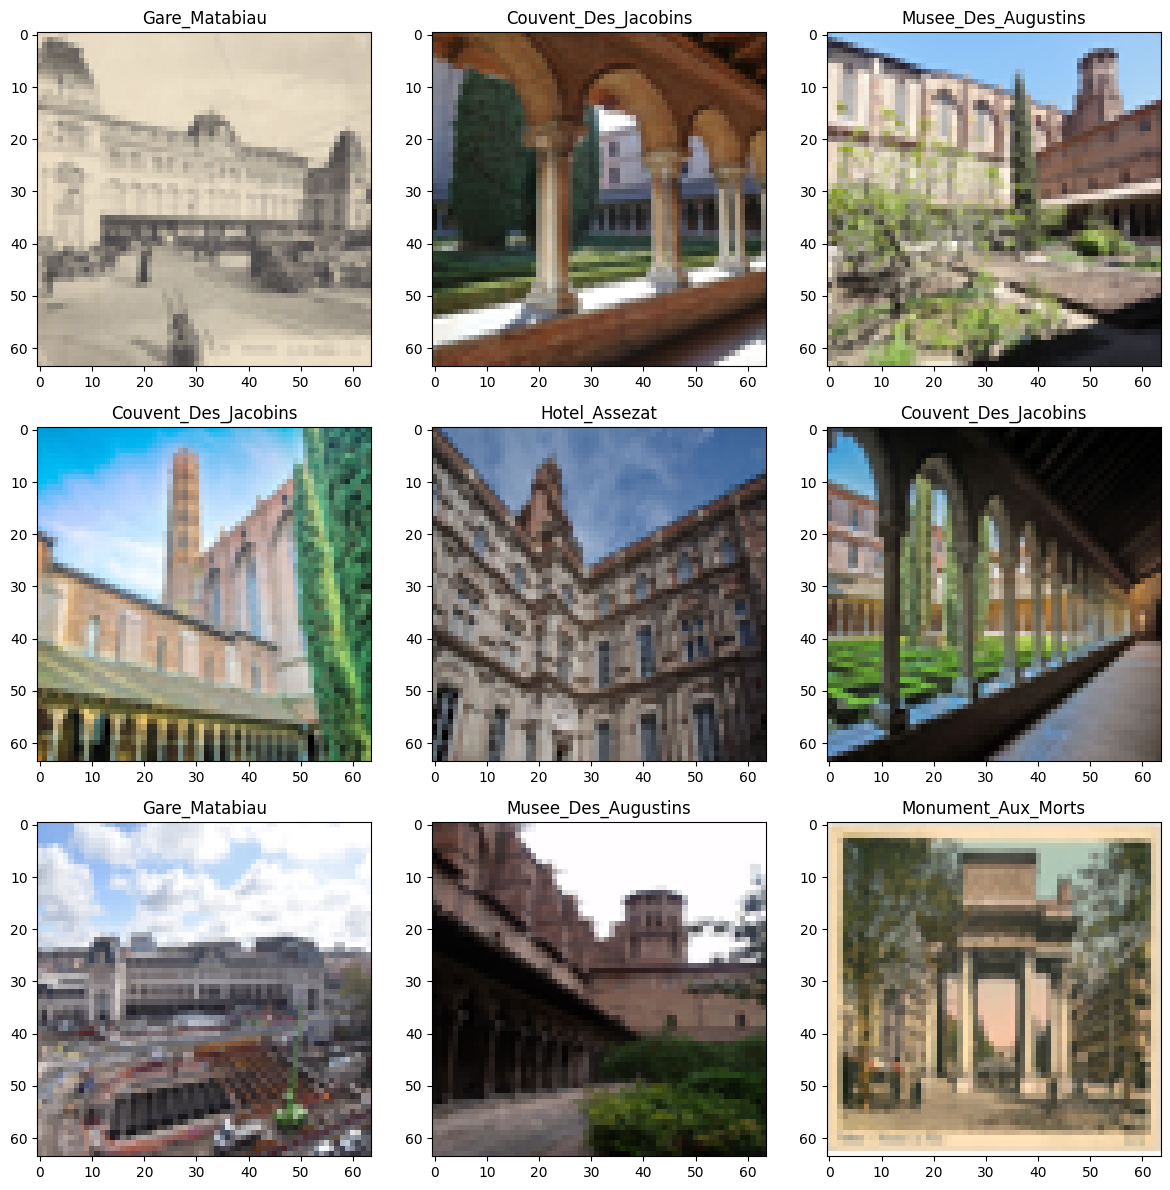

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
nb_images_total = 885
shuffle_indices = np.random.permutation(nb_images_total)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()